# Create SVG OSM ONLY

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

## Defines

In [13]:
export_folder = Path('../export')
export_folder_db = export_folder / 'settlements.gpkg'
export_folder_shapes = export_folder / 'shapes'
export_folder_svg = export_folder / 'svg'

## Colors

In [14]:
color_boundaries_fill = {
    '2014': '#F29888',
    '2022': '#FBD6C9',
    'not-captured': '#D1D4F2'
}

color_boundaries_stroke = {
    '2014': '#C95642',
    '2022': '#C6220E',
    'not-captured': '#2B36A0'
}

color_buildings = {
    '2014': '#F29888',
    '2022': '#E6482F',
    'not-captured': '#4D59C1'
}

color_streets = {
    '2014': '#F29888',
    '2022': '#E6482F',
    'not-captured': '#4D59C1',
}

color_railway = {
    '2014': '#F29888',
    '2022': '#E6482F',
    'not-captured': '#4D59C1'
}

edge_streets = {
    'primary': 0.5,
    'primary_link': 0.5,
    'secondary': 0.5,
    'secondary_link': 0.5,
    'tertiary_link': 0.5,
    'tertiary': 0.2,
    'default': 0.2
}

## Open List

In [15]:
# Load List
gdf_cities = gpd.read_file(export_folder_db)

if not export_folder_svg.exists():
    export_folder_svg.mkdir()

## Loopdiloop

Create svg for mariupol
Create svg for luhansk
Create svg for makiivka


KeyboardInterrupt: 

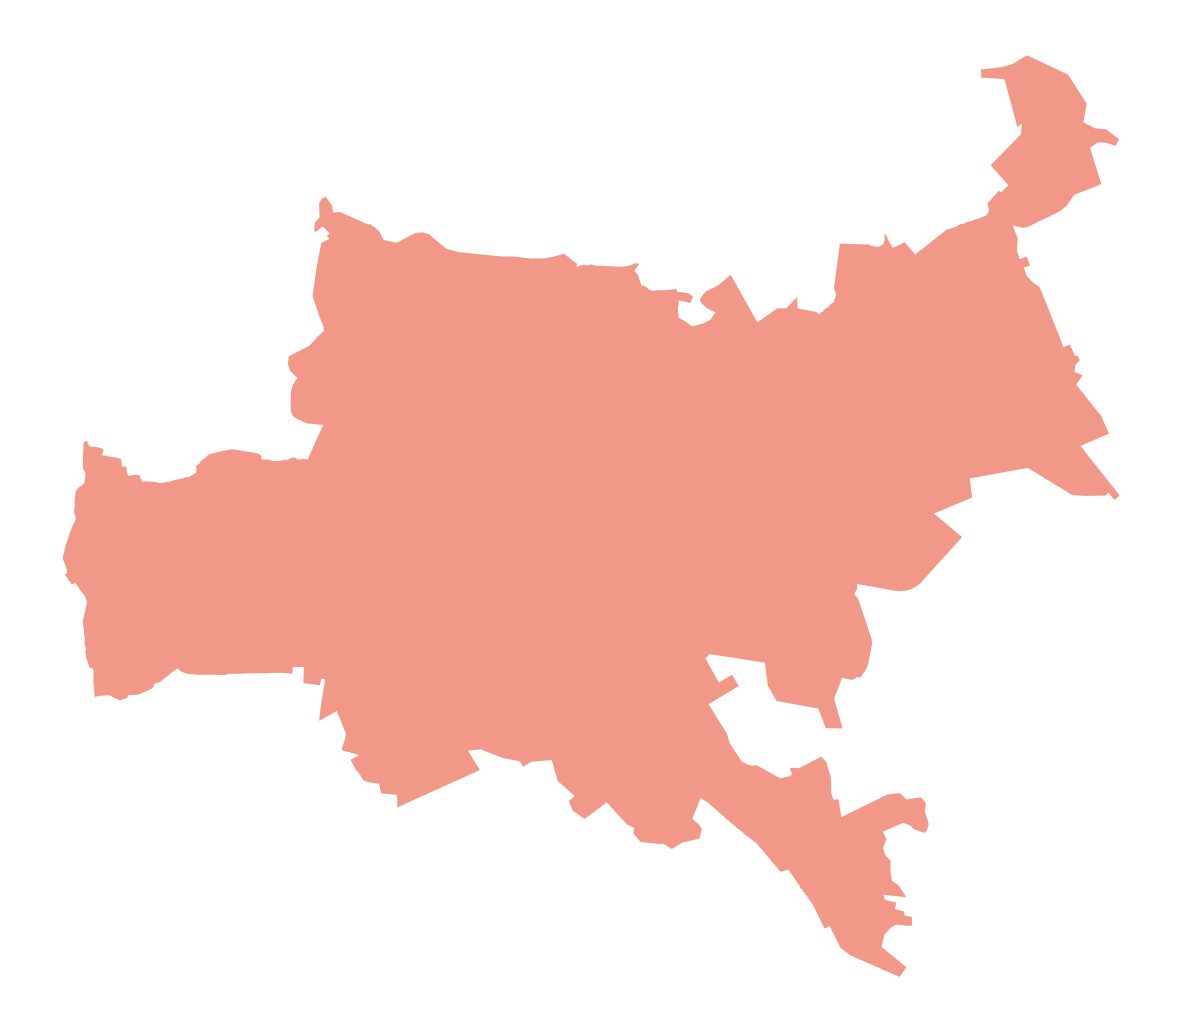

In [16]:
def get_name(row):
    if (row['name:en'] is not np.nan) and (row['name:en'] is not None):
        return row['name:en'].lower()
    else:
        return row['name'].lower()

for i, row in gdf_cities.iterrows():

    name = get_name(row)

    export_name = export_folder_svg / f"{name}.svg"

    # Skip of already exists
    if export_name.exists():
        continue

    print(f"Create svg for {name}")

    # Open Shapes
    gdf_boundaries = gpd.read_file(export_folder_shapes / f"{name}_boundaries.gpkg")
    gdf_streets = gpd.read_file(export_folder_shapes / f"{name}_streets.gpkg")
    gdf_railway = gpd.read_file(export_folder_shapes / f"{name}_railway.gpkg")
    gdf_buildings = gpd.read_file(export_folder_shapes / f"{name}_buildings.gpkg")

    # Clean
    # Only take this types for streets
    # highways = ['primary', 'primary_link', 'secondary', 'secondary_link', 'tertiary', 'tertiary_link']
    # gdf_streets = gdf_streets[gdf_streets['highway'].isin(highways)]
    gdf_streets = gdf_streets[~gdf_streets.geometry.type.isin(['Point'])]
    gdf_railway = gdf_railway[~gdf_railway.geometry.type.isin(['Point'])]

    # Add highway linewith
    gdf_streets['linewidth'] = gdf_streets['highway'].apply(lambda x: edge_streets[x] if x in edge_streets else edge_streets['default'])

    # Plot SVG
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_axis_off()
    gdf_boundaries.plot(ax=ax, edgecolor=None, color=color_boundaries_fill[row['occupied_since']], linewidth=0.6)
    if len(gdf_streets) > 0:
        gdf_streets.plot(ax=ax, color=color_streets[row['occupied_since']], linewidth=gdf_streets['linewidth'])
    if len(gdf_railway) > 0:
        gdf_railway.plot(ax=ax, color=color_railway[row['occupied_since']], linewidth=1, linestyle='--')
    gdf_buildings.plot(ax=ax, color=color_buildings[row['occupied_since']], linewidth=1)

    fig.savefig(export_name, format='svg', bbox_inches='tight')
    plt.close(fig)
